# Bài tập lớn: Phân tích dữ liệu giá cổ phiếu

Họ và tên: Nguyễn Đoàn Nhật Minh  
Mã sinh viên: 24022403

## 1. Thu thập dữ liệu giá cổ phiếu

In [38]:
!pip3 install yfinance

Import các thư viện cần thiết

In [39]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

Lấy dữ liệu về

                       Date        Open        High         Low       Close  \
0 2024-06-20 00:00:00-04:00  178.167854  178.295309  170.141979  171.361069   
1 2024-06-21 00:00:00-04:00  167.518052  169.329901  163.147487  163.859787   
2 2024-06-24 00:00:00-04:00  162.736919  164.614981  157.643857  157.797470   
3 2024-06-25 00:00:00-04:00  158.582379  159.168099  155.001675  156.665665   
4 2024-06-26 00:00:00-04:00  158.333614  160.371231  155.952098  157.776642   

     Volume  Dividends  Stock Splits  
0  68157000      0.000           0.0  
1  99999000      0.000           0.0  
2  58575000      0.525           0.0  
3  56810000      0.000           0.0  
4  46479000      0.000           0.0  


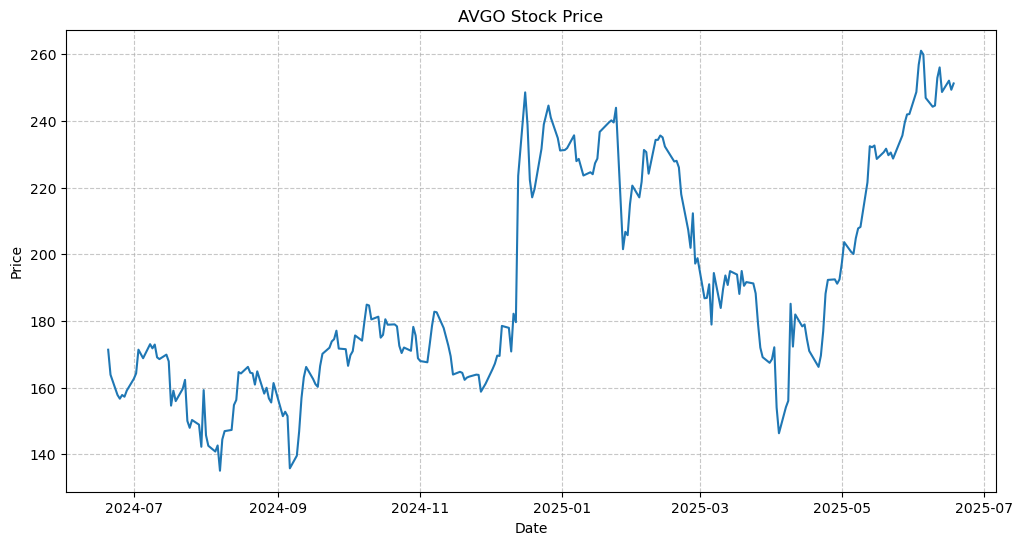

In [40]:
symbol = "AVGO"
df = yf.Ticker(symbol).history(period='1y').reset_index()
print(df.head())
plt.figure(figsize=(12, 6))  
sns.lineplot(data=df, x='Date', y='Close')
plt.title(f'{symbol} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          250 non-null    datetime64[ns, America/New_York]
 1   Open          250 non-null    float64                         
 2   High          250 non-null    float64                         
 3   Low           250 non-null    float64                         
 4   Close         250 non-null    float64                         
 5   Volume        250 non-null    int64                           
 6   Dividends     250 non-null    float64                         
 7   Stock Splits  250 non-null    float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 15.8 KB


Lưu dữ liệu thô

In [42]:
df.to_csv(r'C:\Users\User\Documents\Code\LTXLDL\BTL\data\AVGO_raw_data.csv', index=False)

## 2. Làm sạch và tiền xử lý dữ liệu

Xử lý giá trị thiếu

In [43]:
df.dropna(inplace=True)

Kiểm tra và loại bỏ bất thường (outliers)

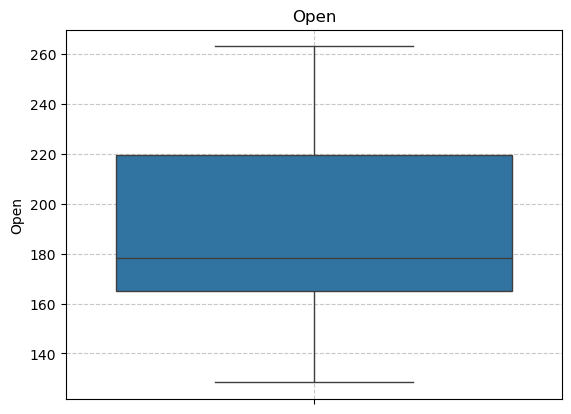

In [44]:
sns.boxplot(df['Open']) # Không có bất thường nào
plt.title('Open')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

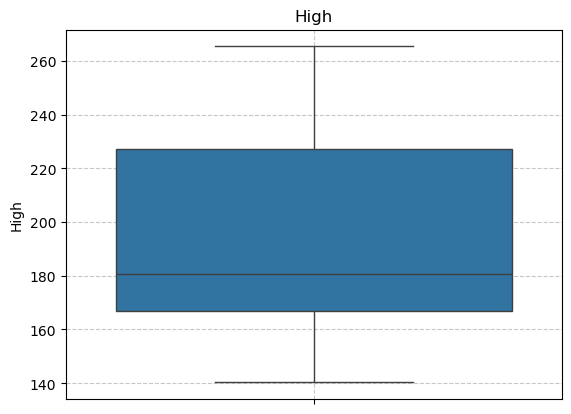

In [45]:
sns.boxplot(df['High']) # Không có bất thường nào
plt.title('High')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

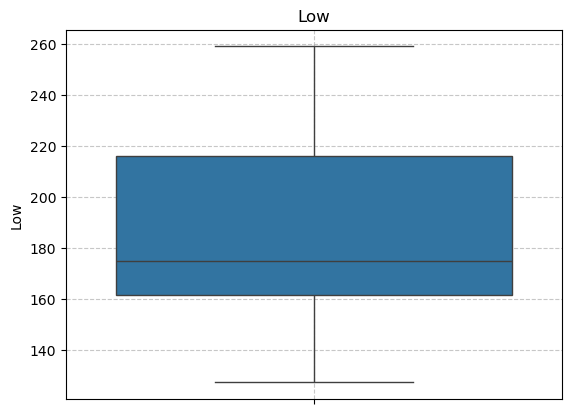

In [46]:
sns.boxplot(df['Low']) # Không có bất thường nào
plt.title('Low')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

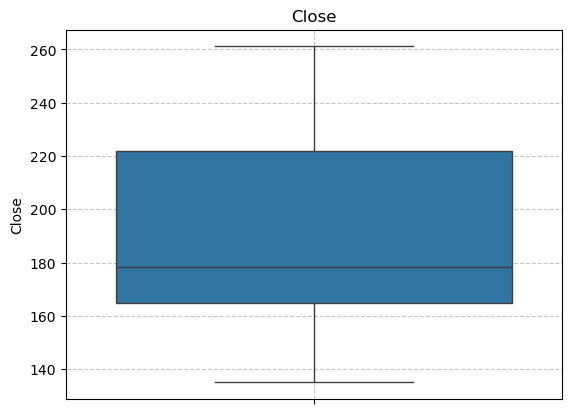

In [47]:
sns.boxplot(df['Close']) # Không có bất thường nào
plt.title('Close')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

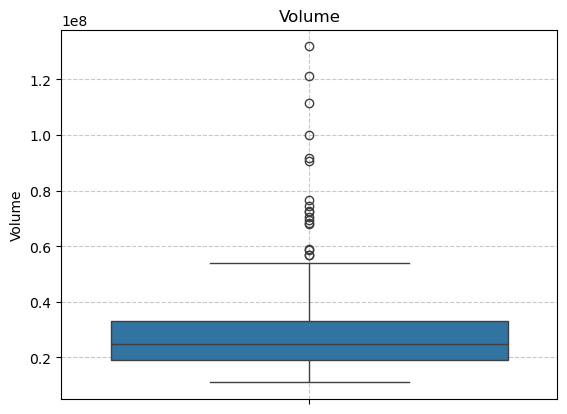

In [48]:
sns.boxplot(df['Volume'])
plt.title('Volume')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Những điểm giá trị cao bất thường của Volume được giữ lại để phân tích sâu hơn

Chuyển cột ngày tháng về định dạng datetime

In [49]:
df['Date'] = pd.to_datetime(df['Date'])

Lưu dữ liệu đã xử lý

In [50]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-06-20 00:00:00-04:00,178.167854,178.295309,170.141979,171.361069,68157000,0.000,0.0
1,2024-06-21 00:00:00-04:00,167.518052,169.329901,163.147487,163.859787,99999000,0.000,0.0
2,2024-06-24 00:00:00-04:00,162.736919,164.614981,157.643857,157.797470,58575000,0.525,0.0
3,2024-06-25 00:00:00-04:00,158.582379,159.168099,155.001675,156.665665,56810000,0.000,0.0
4,2024-06-26 00:00:00-04:00,158.333614,160.371231,155.952098,157.776642,46479000,0.000,0.0
...,...,...,...,...,...,...,...,...
245,2025-06-12 00:00:00-04:00,250.190002,257.890015,249.500000,256.070007,20410900,0.000,0.0
246,2025-06-13 00:00:00-04:00,250.660004,254.000000,248.350006,248.699997,19028400,0.000,0.0
247,2025-06-16 00:00:00-04:00,250.350006,255.190002,249.570007,252.100006,20363000,0.000,0.0
248,2025-06-17 00:00:00-04:00,250.949997,253.960007,247.919998,249.369995,22014300,0.000,0.0


In [51]:
df.to_csv(r'C:\Users\User\Documents\Code\LTXLDL\BTL\data\AVGO_processed_data.csv', index=False)

## 3. Tính toán chỉ số kỹ thuật cơ bản

In [52]:
df_price = df[['Date', 'Close']].copy()
df_price.set_index('Date', inplace=True)
df_price

,Close
Date,
2024-06-20 00:00:00-04:00,171.361069
2024-06-21 00:00:00-04:00,163.859787
2024-06-24 00:00:00-04:00,157.797470
2024-06-25 00:00:00-04:00,156.665665
2024-06-26 00:00:00-04:00,157.776642
...,...
2025-06-12 00:00:00-04:00,256.070007
2025-06-13 00:00:00-04:00,248.699997
2025-06-16 00:00:00-04:00,252.100006


In [53]:
# Tính trung bình động đơn giản SMA trong khoảng 20 ngày và 50 ngày
df_price['SMA_20'] = df_price['Close'].rolling(window=20).mean()
df_price['SMA_50'] = df_price['Close'].rolling(window=50).mean()
df_price['SMA_20']

Date
2024-06-20 00:00:00-04:00           NaN
2024-06-21 00:00:00-04:00           NaN
2024-06-24 00:00:00-04:00           NaN
2024-06-25 00:00:00-04:00           NaN
2024-06-26 00:00:00-04:00           NaN
                                ...    
2025-06-12 00:00:00-04:00    242.152499
2025-06-13 00:00:00-04:00    242.955499
2025-06-16 00:00:00-04:00    244.130000
2025-06-17 00:00:00-04:00    245.066999
2025-06-18 00:00:00-04:00    246.045999
Name: SMA_20, Length: 250, dtype: float64

In [54]:
# Tính trung bình động hàm mũ EMA trong khoảng 20 ngày
df_price['EMA_20'] = df_price['Close'].ewm(span=20, adjust=False, min_periods=20).mean()
df_price['EMA_20']

Date
2024-06-20 00:00:00-04:00           NaN
2024-06-21 00:00:00-04:00           NaN
2024-06-24 00:00:00-04:00           NaN
2024-06-25 00:00:00-04:00           NaN
2024-06-26 00:00:00-04:00           NaN
                                ...    
2025-06-12 00:00:00-04:00    240.706137
2025-06-13 00:00:00-04:00    241.467457
2025-06-16 00:00:00-04:00    242.480081
2025-06-17 00:00:00-04:00    243.136263
2025-06-18 00:00:00-04:00    243.909952
Name: EMA_20, Length: 250, dtype: float64

In [55]:
# Tính chỉ số sức mạnh tương đối RSI
diff = df_price['Close'].diff() # Chênh lệch giá giữa 2 ngày
gain = diff.where(diff > 0, 0.0)
loss = - diff.where(diff < 0, 0.0)
period = 14
avg_gain = gain.ewm(alpha=1/period, adjust=False, min_periods=period).mean()
avg_loss = loss.ewm(alpha=1/period, adjust=False, min_periods=period).mean()
rs = avg_gain / avg_loss
df_price['RSI'] = 100.0 - (100.0 / (1.0 + rs))
df_price['RSI']

Date
2024-06-20 00:00:00-04:00          NaN
2024-06-21 00:00:00-04:00          NaN
2024-06-24 00:00:00-04:00          NaN
2024-06-25 00:00:00-04:00          NaN
2024-06-26 00:00:00-04:00          NaN
                               ...    
2025-06-12 00:00:00-04:00    68.762567
2025-06-13 00:00:00-04:00    60.818570
2025-06-16 00:00:00-04:00    62.945367
2025-06-17 00:00:00-04:00    60.123360
2025-06-18 00:00:00-04:00    61.413140
Name: RSI, Length: 250, dtype: float64

In [56]:
df_price

,Close,SMA_20,SMA_50,EMA_20,RSI
Date,,,,,
2024-06-20 00:00:00-04:00,171.361069,NaN,NaN,NaN,NaN
2024-06-21 00:00:00-04:00,163.859787,NaN,NaN,NaN,NaN
2024-06-24 00:00:00-04:00,157.797470,NaN,NaN,NaN,NaN
2024-06-25 00:00:00-04:00,156.665665,NaN,NaN,NaN,NaN
2024-06-26 00:00:00-04:00,157.776642,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-06-12 00:00:00-04:00,256.070007,242.152499,208.917199,240.706137,68.762567
2025-06-13 00:00:00-04:00,248.699997,242.955499,210.449399,241.467457,60.818570
2025-06-16 00:00:00-04:00,252.100006,244.130000,212.411200,242.480081,62.945367


## 4. Phân tích dữ liệu

#### Tính lợi suất ngày

In [ ]:
df_price['Daily Return'] = df_price['Close'].pct_change()
df_price['Daily Return']

Date
2024-06-20 00:00:00-04:00         NaN
2024-06-21 00:00:00-04:00   -0.043775
2024-06-24 00:00:00-04:00   -0.036997
2024-06-25 00:00:00-04:00   -0.007173
2024-06-26 00:00:00-04:00    0.007091
                               ...   
2025-06-12 00:00:00-04:00    0.012495
2025-06-13 00:00:00-04:00   -0.028781
2025-06-16 00:00:00-04:00    0.013671
2025-06-17 00:00:00-04:00   -0.010829
2025-06-18 00:00:00-04:00    0.007579
Name: Daily Return, Length: 250, dtype: float64

#### Tính độ biến động theo tháng


In [ ]:
monthly_vol = df_price['Daily Return'].resample('ME').std() * np.sqrt(df_price['Daily Return'].resample('ME').count())
monthly_vol = monthly_vol.to_frame(name='Monthly Volatility').reset_index()
monthly_vol['Date'] = monthly_vol['Date'].dt.strftime('%m-%Y')
monthly_vol = monthly_vol.drop([0, 12])
monthly_vol

,Date,Monthly Volatility
1,07-2024,0.191495
2,08-2024,0.166348
3,09-2024,0.173000
4,10-2024,0.109081
5,11-2024,0.082555
6,12-2024,0.302737
7,01-2025,0.198642
8,02-2025,0.136589
9,03-2025,0.167793
10,04-2025,0.266284


#### Tương quan giữa các chỉ số

In [67]:
corr_data = df_price[['Close', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI']].dropna()
corr_matrix = corr_data.corr()
corr_matrix

,Close,SMA_20,SMA_50,EMA_20,RSI
Close,1.000000,0.829502,0.518088,0.880829,0.652798
SMA_20,0.829502,1.000000,0.794528,0.989793,0.174751
SMA_50,0.518088,0.794528,1.000000,0.788631,-0.223590
EMA_20,0.880829,0.989793,0.788631,1.000000,0.247731
RSI,0.652798,0.174751,-0.223590,0.247731,1.000000


## 5. Trực quan hóa

### 4.1. Biểu đồ giá đóng cửa kèm chỉ số SMA

#### Biểu đồ đường


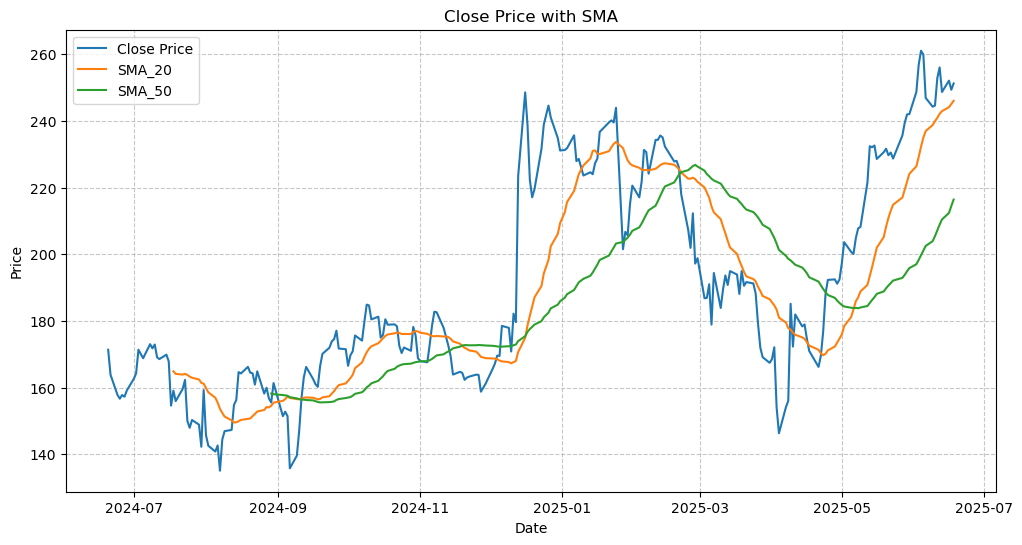

In [57]:
plt.figure(figsize=(12, 6))  
sns.lineplot(data=df_price, x='Date', y='Close', label='Close Price')
sns.lineplot(data=df_price, x='Date', y='SMA_20', label='SMA_20')
sns.lineplot(data=df_price, x='Date', y='SMA_50', label='SMA_50')
plt.title('Close Price with SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Biểu đồ Scatter Plot giữa Close Price và SMA

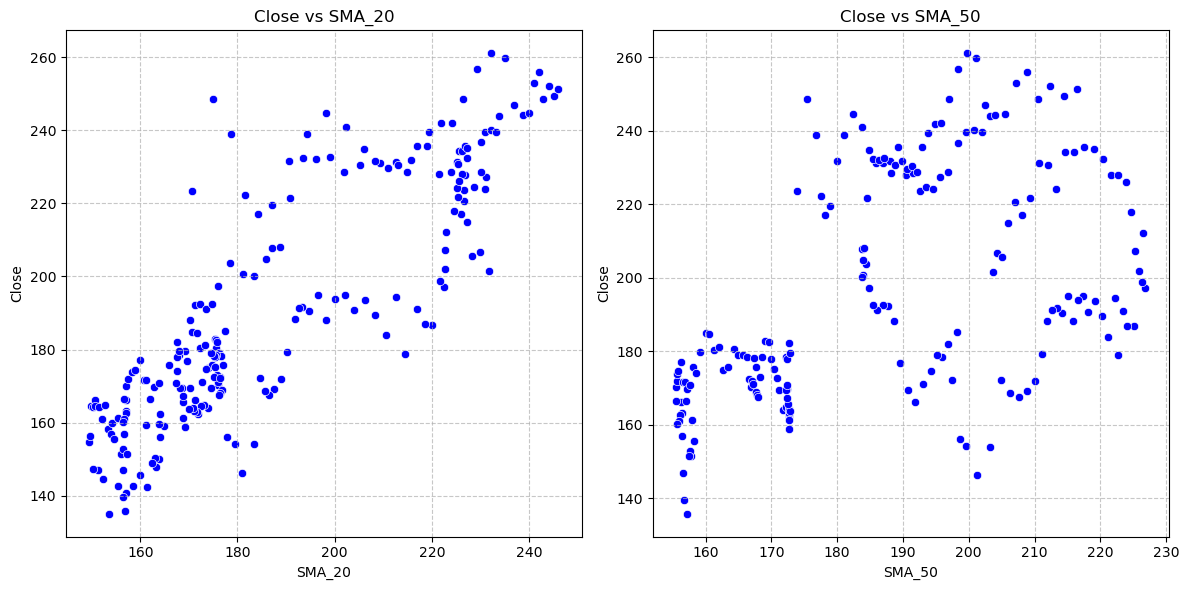

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x='SMA_20', y='Close', data=df_price, ax=axs[0], color='blue')
axs[0].set_title('Close vs SMA_20')
sns.scatterplot(x='SMA_50', y='Close', data=df_price, ax=axs[1], color='blue')
axs[1].set_title('Close vs SMA_50')
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[1].grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4.2. Biểu đồ giá đóng cửa kèm chỉ số EMA

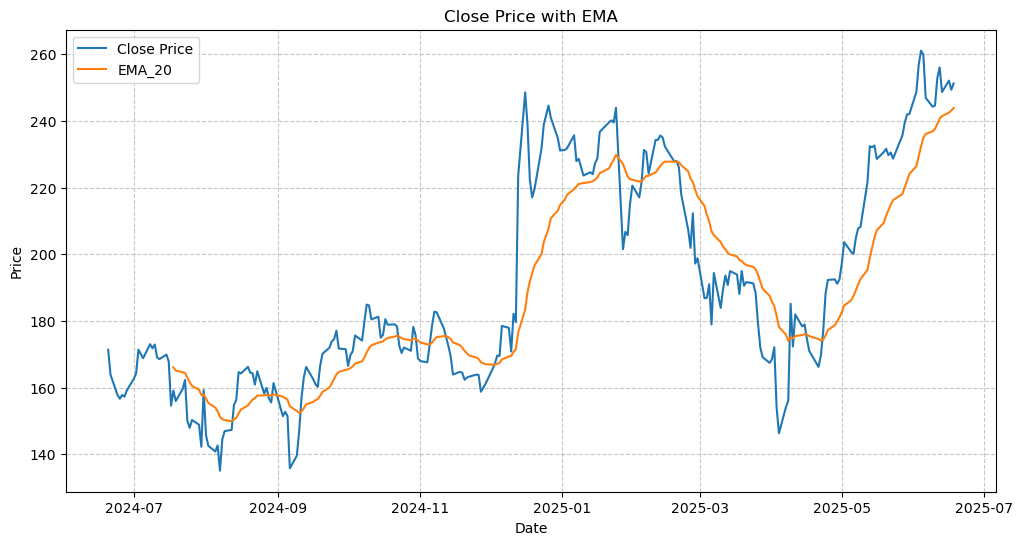

In [59]:
new_df = df_price.copy()
new_df.dropna(inplace=True)
plt.figure(figsize=(12, 6))  
sns.lineplot(data=df_price, x='Date', y='Close', label='Close Price')
sns.lineplot(data=df_price, x='Date', y='EMA_20', label='EMA_20')
plt.title('Close Price with EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 4.3. Biểu đồ Heatmap giữa Close Price, chỉ số SMA, EMA và RSI

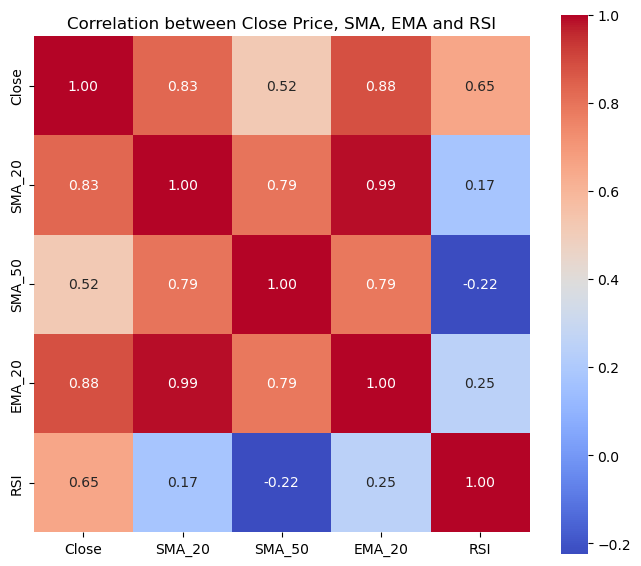

In [60]:
corr_data = df_price[['Close', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI']].dropna()
corr_matrix = corr_data.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation between Close Price, SMA, EMA and RSI')
plt.show()

### 4.4. Biểu đồ giá đóng cửa và RSI

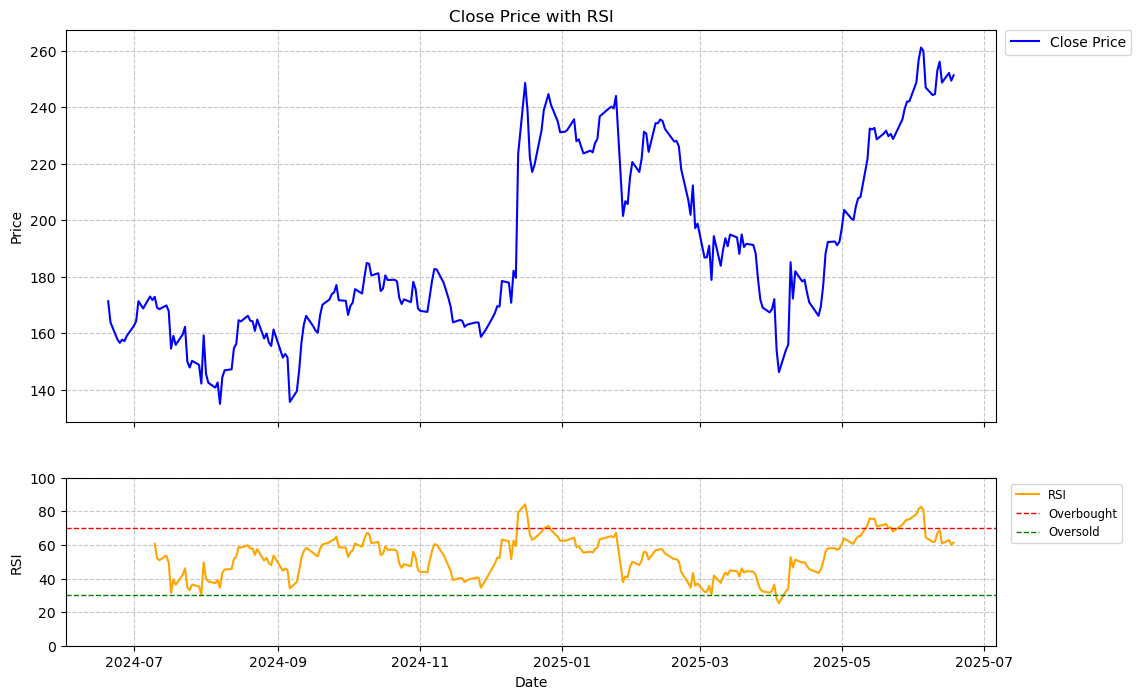

In [61]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [0.7, 0.3]})
sns.lineplot(ax=axs[0], data=df_price, x='Date', y='Close', label='Close Price', color='blue')
axs[0].set_ylabel('Price')
axs[0].set_title('Close Price with RSI')
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].legend(loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0)
sns.lineplot(ax=axs[1], data=df_price, x='Date', y='RSI', label='RSI', color='orange')
axs[1].set_ylabel('RSI')
axs[1].set_xlabel('Date')
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].axhline(70, color='red', linestyle='--', linewidth=1, label='Overbought')
axs[1].axhline(30, color='green', linestyle='--', linewidth=1, label='Oversold')
axs[1].set_ylim(0, 100)
axs[1].legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize='small')
plt.show()

### 4.5. Lợi suất ngày và phân phối lợi suất

#### Biểu đồ phân phối của lợi suất ngày

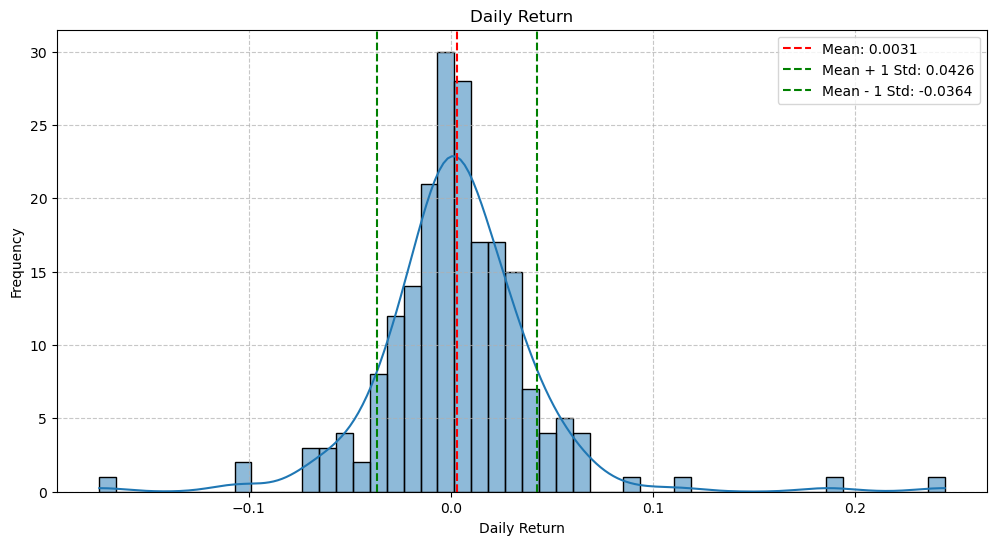

In [63]:
new_df = df_price.copy()
new_df.dropna(inplace=True)
mean_return = new_df['Daily Return'].mean()
std_return = new_df['Daily Return'].std()
plt.figure(figsize=(12, 6))
sns.histplot(new_df['Daily Return'], kde=True, bins=50)
plt.title('Daily Return')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.axvline(new_df['Daily Return'].mean(), color='red', linestyle='--', label=f"Mean: {new_df['Daily Return'].mean():.4f}")
plt.axvline(mean_return + std_return, color='green', linestyle='--', label=f'Mean + 1 Std: {mean_return + std_return:.4f}')
plt.axvline(mean_return - std_return, color='green', linestyle='--', label=f'Mean - 1 Std: {mean_return - std_return:.4f}')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### 4.6. Độ biến động theo tháng

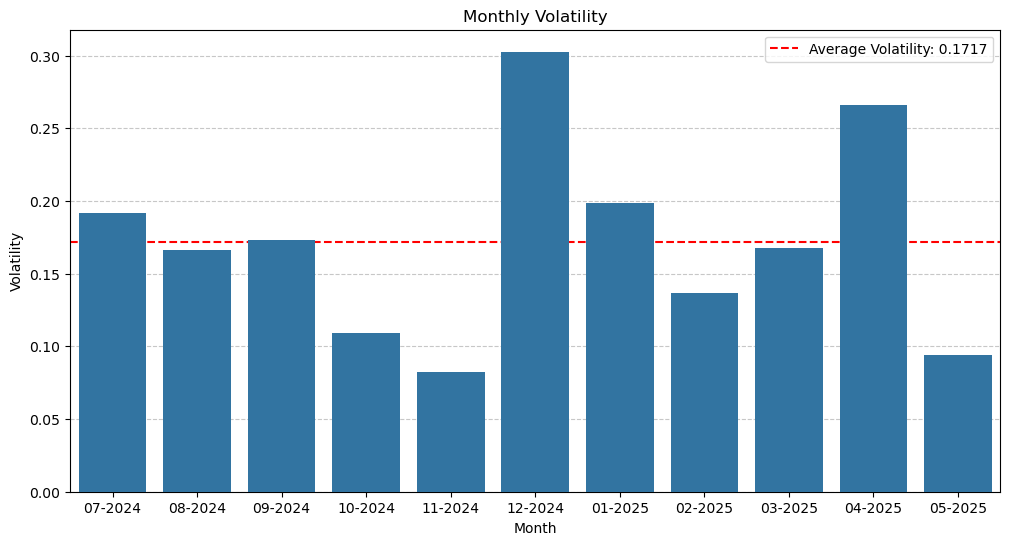

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_vol, x='Date', y='Monthly Volatility', zorder=3)
plt.title('Monthly Volatility')
plt.ylabel('Volatility')
plt.xlabel('Month')
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.axhline(monthly_vol['Monthly Volatility'].mean(), color='red', linestyle='--', label=f'Average Volatility: {monthly_vol['Monthly Volatility'].mean():.4f}')
plt.legend()
plt.show()

### 4.7. Khối lượng giao dịch

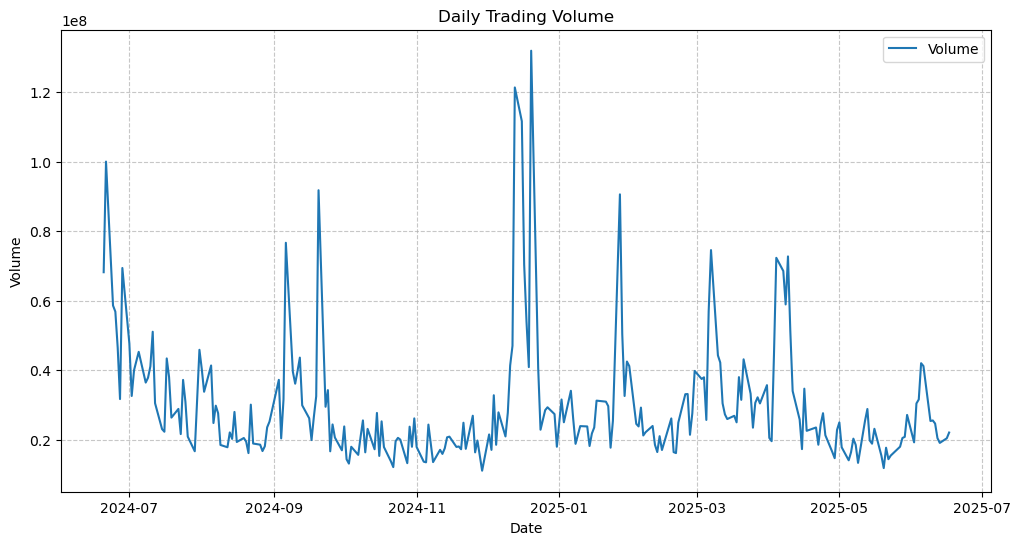

In [66]:
daily_volume = df[['Date', 'Volume']]
daily_volume = daily_volume[:-1]
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_volume, x='Date', y='Volume', label='Volume')
plt.title('Daily Trading Volume')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()